In [1]:
import pandas as pd
x=pd.read_csv('card_transdata.csv')
x

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [3]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
x.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [7]:
x.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


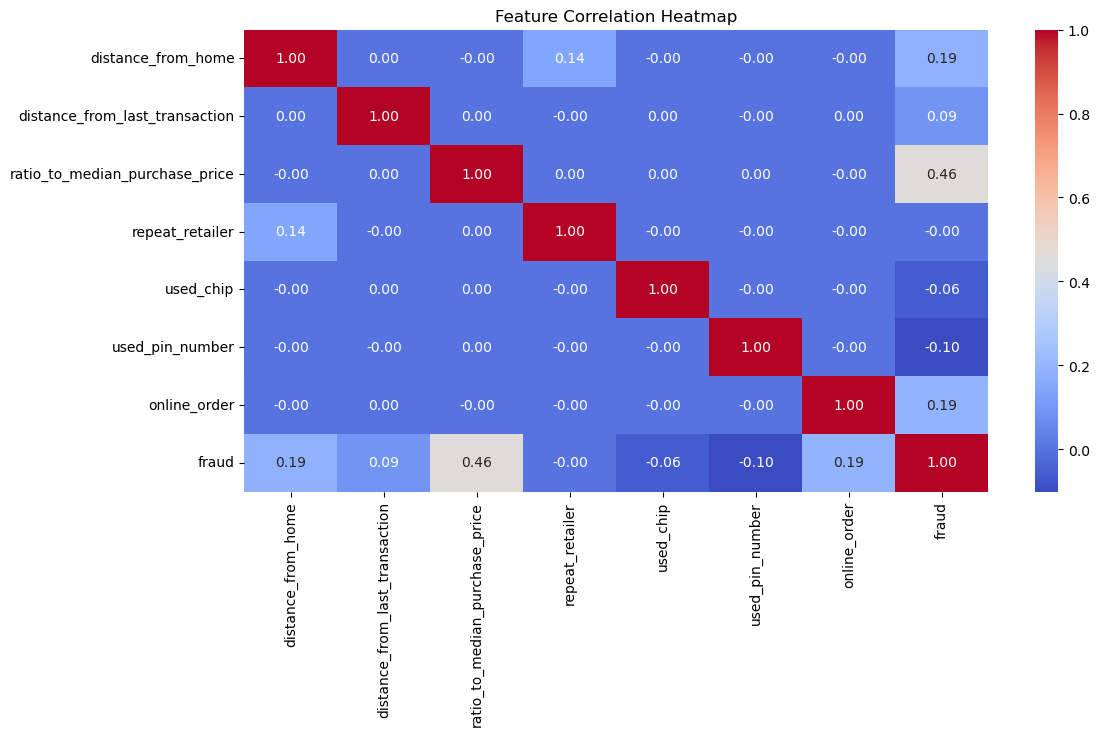

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.heatmap(x.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

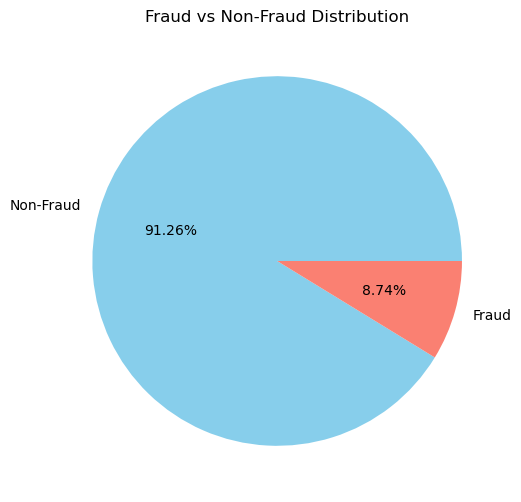

In [11]:
labels = ["Non-Fraud", "Fraud"]
fraud_counts = x["fraud"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=labels, autopct="%.2f%%", colors=["skyblue", "salmon"])
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

In [15]:
a=x.drop(['fraud'],axis=1)
b=x.fraud
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc=StandardScaler()
a=sc.fit_transform(a)
xtrain,xtest,ytrain,ytest=train_test_split(a,b,train_size=0.9,random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [19]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
lrs=lr.score(xtest,ytest)
lrs

0.95875

In [21]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
rfs=rf.score(xtest,ytest)
rfs

0.99999

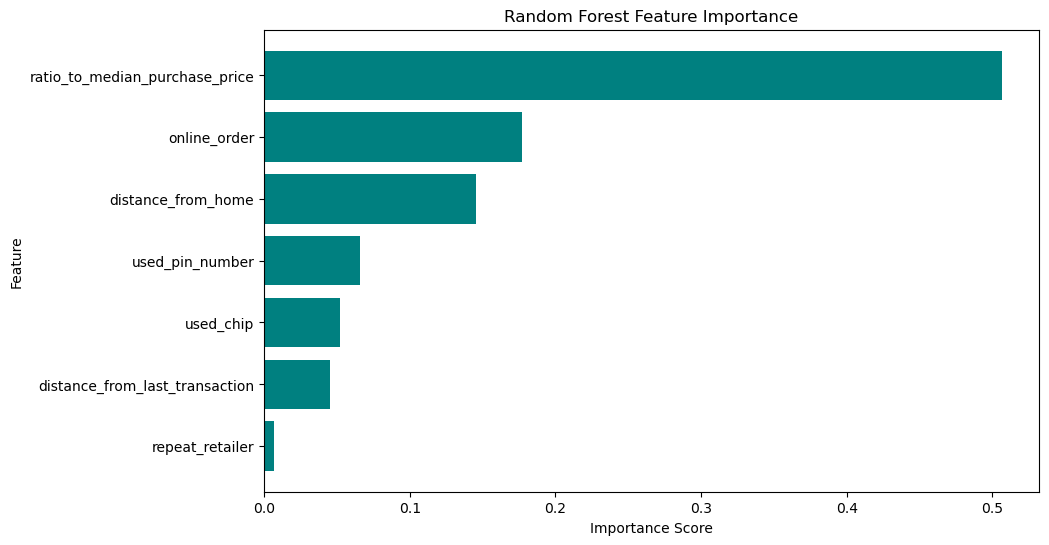

In [23]:
import numpy as np
importances = rf.feature_importances_
features = x.drop("fraud", axis=1).columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.barh(features[indices], importances[indices], color="teal")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()

In [25]:
xg=XGBClassifier()
xg.fit(xtrain,ytrain)
xgs=xg.score(xtest,ytest)
xgs

0.99791

<Figure size 2000x700 with 0 Axes>

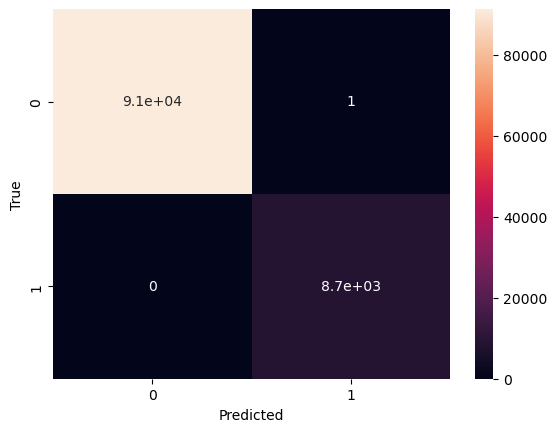

<Figure size 2000x700 with 0 Axes>

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
ypr=rf.predict(xtest)
cm=confusion_matrix(ypr,ytest)
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.figure(figsize=(20,7))